=== LANGKAH 1: MEMUAT DATASET ===
✅ Berhasil membaca file CSV!
   Jam_Belajar  Nilai_UTS  Status_Kelulusan
0            1         30                 0
1            2         35                 0
2            2         40                 0
3            3         40                 0
4            3         50                 0

=== MULAI TRAINING (1000 Iterasi) ===
Iterasi 0: Error (Cost) = 0.6801
Iterasi 100: Error (Cost) = 0.4939
Iterasi 200: Error (Cost) = 0.4816
Iterasi 300: Error (Cost) = 0.4762
Iterasi 400: Error (Cost) = 0.4733
Iterasi 500: Error (Cost) = 0.4716
Iterasi 600: Error (Cost) = 0.4705
Iterasi 700: Error (Cost) = 0.4698
Iterasi 800: Error (Cost) = 0.4694
Iterasi 900: Error (Cost) = 0.4691

✅ TRAINING SELESAI!
Parameter Optimal: [ 0.37823439 -0.40244654  2.00780163]

=== HASIL EVALUASI ===
Akurasi pada Data Latihan : 74.29%
Akurasi pada Data Ujian   : 77.78%


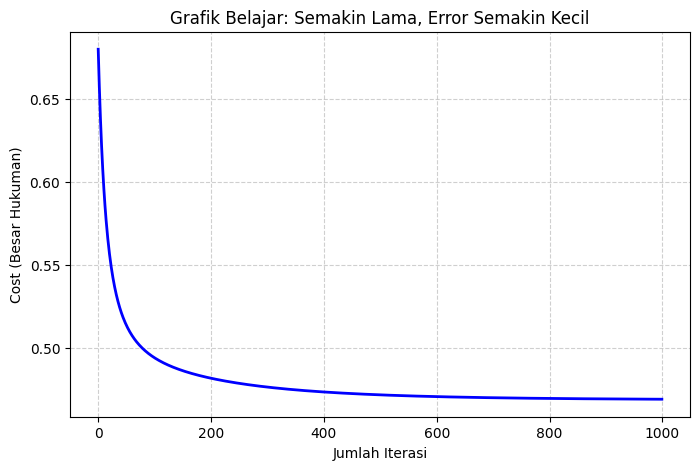

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import io

filename = 'dataset_siswa.csv'
try:
    raw_content = uploaded[filename].decode('utf-8')
except NameError:
    with open(filename, 'r') as f:
        raw_content = f.read()
lines = raw_content.strip().split('\r\n')
cleaned_lines = [line.strip('"') for line in lines]
cleaned_csv_string = '\n'.join(cleaned_lines)
df = pd.read_csv(io.StringIO(cleaned_csv_string), sep=',')
print(df.head())


X = df[["Jam_Belajar", "Nilai_UTS"]].values
y = df["Status_Kelulusan"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

saler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -(1/m) * np.sum(
        y * np.log(h) + (1-y) * np.log(1-h)
    )
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    print(f"\n=== MULAI TRAINING ({iterations} Iterasi) ===")
    for i in range(iterations):
        h = hypothesis(X, theta)
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta = theta - alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iterasi {i}: Error (Cost) = {cost:.4f}")
    return theta, cost_history
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias  = np.c_[np.ones(X_test.shape[0]), X_test]
theta = np.zeros(X_train_bias.shape[1])
alpha = 0.1
iterations = 1000
theta_optimal, cost_history = gradient_descent(
    X_train_bias, y_train, theta, alpha, iterations
)
print("TRAINING SELESAI!")
print(f"Parameter Optimal: {theta_optimal}")

def predict(X, theta, threshold=0.5):
    probabilities = hypothesis(X, theta)
    return (probabilities >= threshold).astype(int)
y_pred_train = predict(X_train_bias, theta_optimal)
y_pred_test  = predict(X_test_bias, theta_optimal)
acc_train = np.mean(y_pred_train == y_train) * 100
acc_test  = np.mean(y_pred_test == y_test) * 100
print("=== HASIL EVALUASI ===")
print(f"Akurasi pada Data Latihan : {acc_train:.2f}%")
print(f"Akurasi pada Data Ujian   : {acc_test:.2f}%")

plt.figure(figsize=(8, 5))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Jumlah Iterasi")
plt.ylabel("Cost (Besar Hukuman)")
plt.title("Grafik Belajar: Semakin Lama, Error Semakin Kecil")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()